# Objective:

**To predict the outcome of IPL games based on history of last 10 years**

This is clearly a binary classification problem wherein I want to classify the winner of a game into two classes: team1 or team2. This is a straigtforward machine learning task.

So I dug around the internet a bit, and found a [dataset](https://www.kaggle.com/manasgarg/ipl#matches.csv) that will serve as a nice example to show the process that should be followed while building a machine learning pipeline to solve the above problem. 

I'm listing the steps I'm going to follow. This is not so much an algorithm as a combination of different techniques applied together to get to the final result.

**Steps:**
1.   Acquire the data
2.   Clean the data for any outliers, missing values and datatype inconsistencies
3.   Convert categorical data into numerical values by techniques such as One-hot-encoding
4.  Select features which might be most relevant for the target variable
5. Standardize/Normalize the data if needed
6. Train machine Learning algorithms:
                a. K-Nearest Neighbors
                b. Logistic Regression
                c. Support Vector Machines
                d. Decision Tree Classifier
                e. Random Forest
                f. Gradient Boosted Decision Trees
                g. Naive Bayes Classifier

This is also illustrated in the following flowchart. In this notebook, I mainly focus on basic EDA and building these classification models using scikit-learn. 


Usually, carefully following the above steps yields a model that generalizes well to unseen data.






## Flowchart

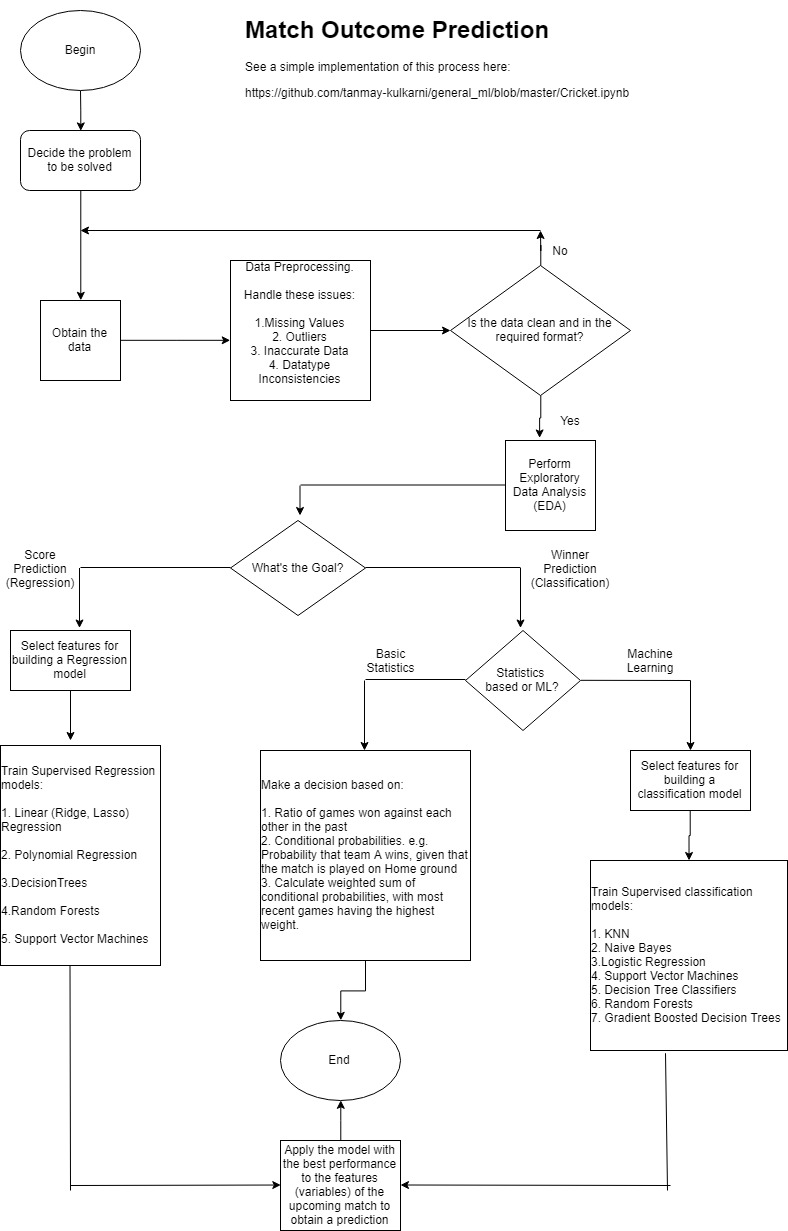

In [102]:
from IPython.display import Image
Image(filename='sokrati_assignment.jpg', width=800, height=800)

In [149]:
from google.colab import files
#files.upload()
files.os.listdir()

['datalab',
 '.config',
 '.cache',
 'sokrati_assignment.jpg',
 'matches.csv',
 '.forever',
 '.local',
 '.ipython']

## EDA
Let's do some Exploratory Data Analysis (EDA)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('matches.csv', index_col='id')

Let's see what our dataframe looks like.

In [152]:
df.head()
#df.venue.value_counts().sort_index()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 1 to 636
Data columns (total 17 columns):
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(4), object(12)
memory usage: 89.4+ KB


To help improve the model accuracy, let's remove the games which were either tied or did not give a result. i.e. only consider data points which had a 'normal' result.

Furthermore, careful examination of the dataset tells you that the team Pune appears under three different names -- Pune Warriors, Rising Pune Supergiant and Rising Pune Supergiant**s**. Let's map them to a single value and also abbreviate the names so as to fascilliatate better visualizations.

In [0]:
df=df[df.result=='normal']

In [0]:
team_to_code = {'Mumbai Indians':'MI',
'Chennai Super Kings':'CSK',
'Kolkata Knight Riders':'KKR',
'Royal Challengers Bangalore':'RCB',
'Kings XI Punjab':'KXIP',
'Rajasthan Royals':'RR',
'Delhi Daredevils':'DD',
'Sunrisers Hyderabad':'SRH',
'Deccan Chargers':'DC',
'Gujarat Lions':'GL',
'Pune Warriors':'RPS',
'Rising Pune Supergiant':'RPS',
'Kochi Tuskers Kerala':'KTK',
'Rising Pune Supergiants':'RPS'}

df.team1=df.team1.map(team_to_code)
df.team2=df.team2.map(team_to_code)
df.toss_winner = df.toss_winner.map(team_to_code)
df.winner = df.winner.map(team_to_code)

In [157]:
df.head(3)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [0]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')
#sbn.set_style('whitegrid')

Let's find out the number of games won by each team over the years.

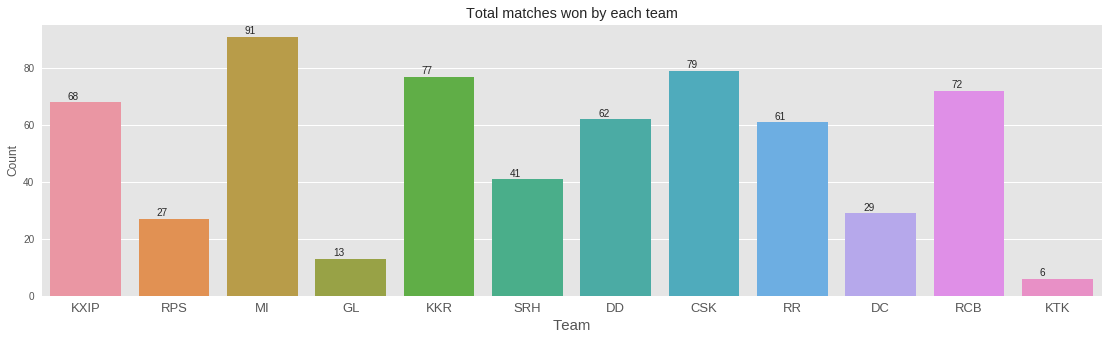

In [159]:
fig, ax = plt.subplots(ncols=1,nrows=1,sharex=False, figsize=(19,5))

#plt.axes(ax[0])

g=sbn.countplot(data=df, x='winner', order=list(set(team_to_code.values())))
_ = g.set_xticklabels(labels=list(set(team_to_code.values())),rotation=0)

for patch in g.patches:
    g.annotate(format(patch.get_height()), (patch.get_x()+0.20, patch.get_height()+1))

plt.xlabel('Team', fontsize=15)
plt.xticks(fontsize=13)
_ = plt.ylabel('Count')
_ = plt.title('Total matches won by each team')

**Some statistics about Toss.**

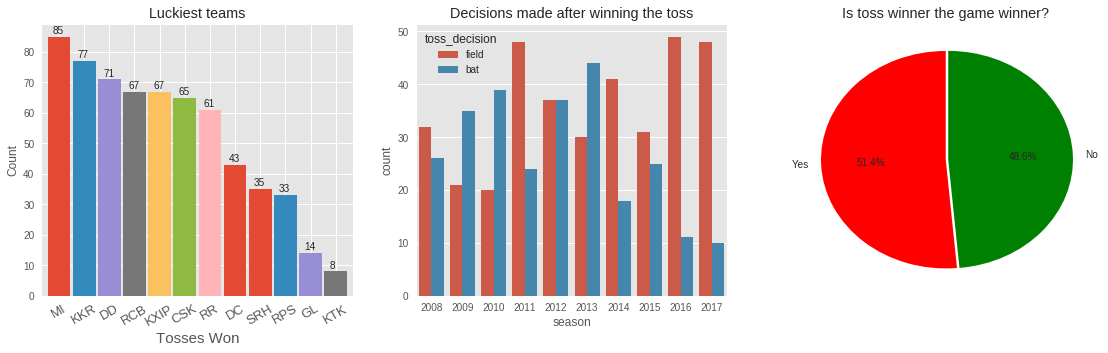

In [160]:
#sbn.set(rc={'figure.figsize':(5,5)})
fig, ax = plt.subplots(nrows=1, ncols=3,sharex=False,figsize=(19,5))

plt.axes(ax[0])
#plt.subplots(figsize=(10,6))
axe = df['toss_winner'].value_counts().plot.bar(width=.9, rot=30)
for patch in axe.patches:
    axe.annotate(format(patch.get_height()), (patch.get_x()+0.20, patch.get_height()+1))

plt.ylabel('Count')
plt.xlabel('Tosses Won', fontsize=15)    
plt.xticks(fontsize=13)
_ = plt.title('Luckiest teams')
# plt.tight_layout()

plt.axes(ax[1])
i = sbn.countplot(x='season',hue='toss_decision', data=df)

df_toss_and_match_winner = df[df.winner == df.toss_winner]
pie_chart_slices = [len(df_toss_and_match_winner), len(df)-len(df_toss_and_match_winner)]
labels = ['Yes', 'No']
_ = plt.title('Decisions made after winning the toss')

plt.axes(ax[2])
pie = plt.pie(pie_chart_slices, labels = labels, colors=['r','g'], explode=(0,0.02), startangle=90, autopct='%1.1f%%')
_ = plt.title('Is toss winner the game winner?')

**Number of Games per Season and top 10 men of the match**

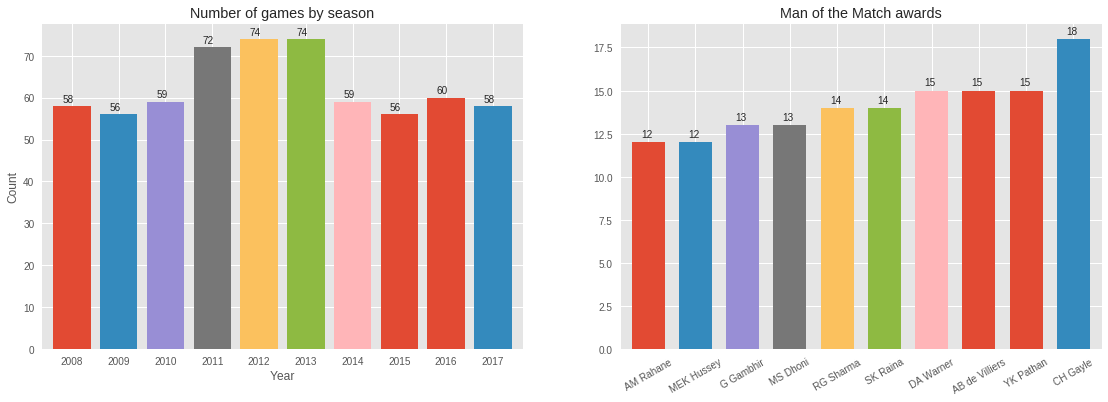

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19,6))
#sbn.countplot(data=df, x='season')

plt.axes(ax[0])
axe = df.season.value_counts().sort_index().plot.bar(width=.8,rot=0)

for patch in axe.patches:
    axe.annotate(format(patch.get_height()), (patch.get_x()+0.20, patch.get_height()+1))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of games by season')


plt.axes(ax[1])

#plt.subplots(figsize=(10,6))
axe = df.player_of_match.value_counts().head(10).sort_values().plot.bar(width=0.7,rot=30)

for patch in axe.patches:
    axe.annotate(format(patch.get_height()),(patch.get_x() + .2, patch.get_height()+.3))

_ = plt.title('Man of the Match awards')

Games played in each city

Text(0,0.5,'City')

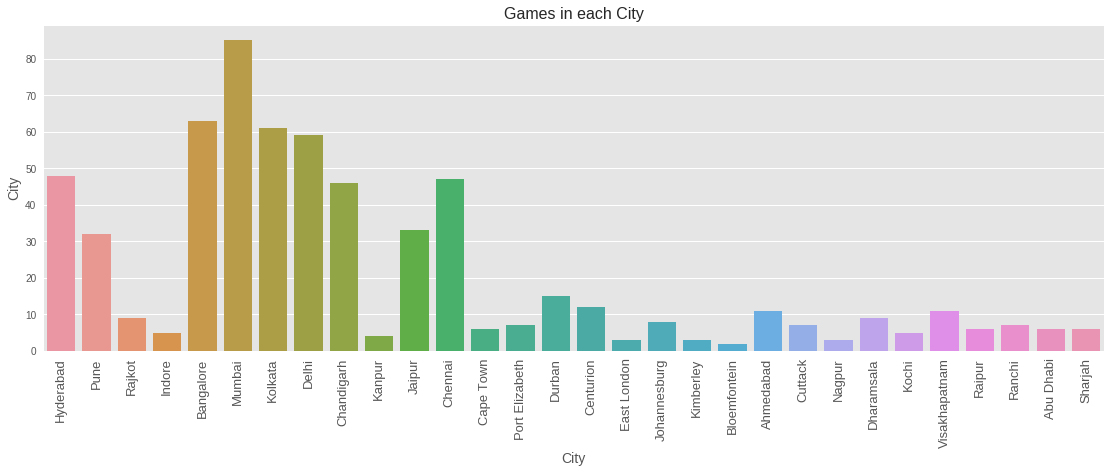

In [162]:
fog, ax = plt.subplots(nrows=1,ncols=1,figsize=(19,6))
cities = df.city.unique().tolist()
h = sbn.countplot(data=df, x = 'city')
_ = h.set_xticklabels(labels=cities, rotation = 90)
plt.title('Games in each City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('City', fontsize=14)


### Let's compare performance of teams

Following is a handy function, that will take two teams and output a summary of their previous encounters. Change team1 and team2 to the teams you want and execute.

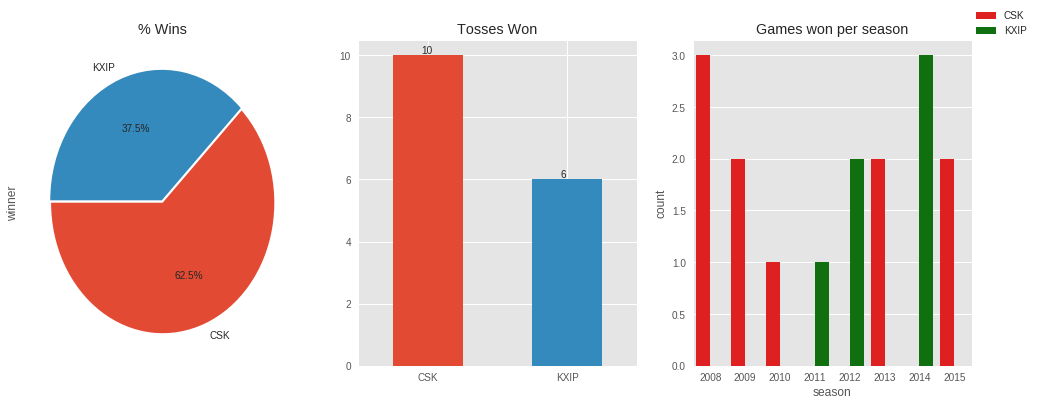

In [165]:
#team1='Mumbai Indians'
team1='KXIP'
team2='CSK'


def compare_teams(team_1,team_2, df):
    
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17,6))
    
    plt.axes(ax[0])
    
    df_t1_t2 = df[((df['team1'] == team1) & (df['team2'] == team2)) | ((df['team1'] == team2) & (df['team2'] == team1))]
    
    df_t1_t2.winner.value_counts().plot.pie(explode=(0,0.02),startangle=180, autopct='%1.1f%%', labels=[team2,team1])
    plt.title('% Wins')
    
    
    plt.axes(ax[1])
    
    axe = df_t1_t2.toss_winner.value_counts().plot.bar(rot=0)
    plt.title('Tosses Won')
    
    for patch in axe.patches:
        axe.annotate(format(patch.get_height()), (patch.get_x()+.2, patch.get_height()+0.05))
    
    plt.axes(ax[2])

    sbn.countplot(data=df_t1_t2, x='season', hue='winner', palette={team1:'g',team2:'r'})
    plt.title('Games won per season')
    ax[2].legend(loc=(1,1))
    
  
compare_teams(team1,team2,df)

In [167]:
df.columns

Index(['season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## Feature Selection for building models

As seen above, there are a lot of features in our data. Which of them should be used for training our models? Making the correct choice here is very critical. The accuracy of a model depends on it. After careful consideration, I've decided to select the following features:


*   city
* team1
* team2
* toss_winner
* venue
* winner

The reason for omiting the other features briefly are:

* Column ID does not offer any meaningful information towards predicting our target.
* 'result', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'player of the match' are columns which will lead to data leakage if included. [Data Leakage](https://machinelearningmastery.com/data-leakage-machine-learning/) in short means, we cannot allow our model to have access to data that won't be available while making predictions.
* date presents a different problem. Since most dates are different, our machine learning models will consider them as different features after using one hot encoding (sklearn needs all data to be numeric), which is pretty useless. And considering that IPL basically lasts a couple of months, it's unlikely that team performance is a function of time.
* Including umpires is also unlikely to contribute anything significant to our models. Outcomes of games rarely depend on the umpires.

winner is our target variable here.

In [0]:
#df_data = df[['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'umpire1', 'umpire2', 'winner']]
#df_data = df[['season', 'city', 'team1', 'team2', 'toss_winner','toss_decision', 'venue', 'winner']]

df_data = df[[ 'team1', 'team2', 'toss_winner','toss_decision', 'winner', 'city', 'venue']]


In [169]:
df_data.head()

,team1,team2,toss_winner,toss_decision,winner,city,venue
id,,,,,,,
1,SRH,RCB,RCB,field,SRH,Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
2,MI,RPS,RPS,field,RPS,Pune,Maharashtra Cricket Association Stadium
3,GL,KKR,KKR,field,KKR,Rajkot,Saurashtra Cricket Association Stadium
4,RPS,KXIP,KXIP,field,KXIP,Indore,Holkar Cricket Stadium
5,RCB,DD,RCB,bat,RCB,Bangalore,M Chinnaswamy Stadium


In [170]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 1 to 636
Data columns (total 7 columns):
team1            626 non-null object
team2            626 non-null object
toss_winner      626 non-null object
toss_decision    626 non-null object
winner           626 non-null object
city             619 non-null object
venue            626 non-null object
dtypes: object(7)
memory usage: 59.1+ KB


### Data Cleaning

Let's see if there are any null values in the data.

In [171]:
df_data[  df_data.toss_decision.isnull() | df_data.toss_winner.isnull() \
   | df_data.team2.isnull() | df_data.team1.isnull() | df_data.city.isnull() | df_data.venue.isnull()]

,team1,team2,toss_winner,toss_decision,winner,city,venue
id,,,,,,,
462,MI,RCB,RCB,field,RCB,NaN,Dubai International Cricket Stadium
463,KKR,DD,KKR,bat,DD,NaN,Dubai International Cricket Stadium
467,CSK,RR,RR,field,CSK,NaN,Dubai International Cricket Stadium
469,SRH,DD,SRH,bat,SRH,NaN,Dubai International Cricket Stadium
470,MI,CSK,MI,bat,CSK,NaN,Dubai International Cricket Stadium
475,RCB,KXIP,KXIP,field,KXIP,NaN,Dubai International Cricket Stadium
477,SRH,MI,MI,field,SRH,NaN,Dubai International Cricket Stadium


There are. Let's drop them.

In [0]:
df_data.dropna(how='any', inplace=True)

In [173]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 1 to 636
Data columns (total 7 columns):
team1            619 non-null object
team2            619 non-null object
toss_winner      619 non-null object
toss_decision    619 non-null object
winner           619 non-null object
city             619 non-null object
venue            619 non-null object
dtypes: object(7)
memory usage: 38.7+ KB


### Data Transformation

We have selected the features of interest. But we can't use them "as is". scikit-learn (the machine learning library I'll be using) needs all features to be numeric. Let's convert categorical features into numerical features with binary values using a technique called "One Hot Encoding". Pandas provides a handy function to accomplish this task.


In [0]:
#df_data.columns
columns = [ 'team1', 'team2', 'toss_winner', 'toss_decision', 'city', 'venue']
df_encoded = pd.get_dummies(data=df_data, columns=columns)

This is how our encoded dataframe looks. The data is now almost ready to be fed into the ML algorithms.

In [175]:
df_encoded.head()

,winner,team1_CSK,team1_DC,team1_DD,team1_GL,team1_KKR,team1_KTK,team1_KXIP,team1_MI,team1_RCB,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
id,,,,,,,,,,,,,,,,,,,,,
1,SRH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RPS,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,KKR,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,KXIP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,RCB,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We also need to encode the target variable -- winner. Note that since it is a classification category, we can directly encode it as 1,2,3,4,...

In [0]:
d = {'MI': 1,
'CSK':2,
'KKR':3,
'RCB':4,
'KXIP':5,
'RR':6,
'DD':7,
'SRH':8,
'DC':9,
'GL':10,
'RPS':11,
'KTK':12}

In [0]:
df_encoded['winner']=df_encoded['winner'].map(d)

In [178]:
df_encoded.head()

,winner,team1_CSK,team1_DC,team1_DD,team1_GL,team1_KKR,team1_KTK,team1_KXIP,team1_MI,team1_RCB,...,venue_Saurashtra Cricket Association Stadium,venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
id,,,,,,,,,,,,,,,,,,,,,
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We will use simple accuracy as the metric to measure model performance. We'll use cross validation to get accurate estimations of our model's reach.

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np

## K-Nearest Neighbors (KNN)

Using KNN, we obtain a mean accuracy of 55%

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

In [181]:
CV = cross_val_score(knn, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.54198473 0.54761905 0.50819672 0.61983471 0.52941176]
Mean accuracy for 5 fold cv: 0.5494093954409268


## Naive Bayes Classifier

Naive Bayes gives a mean accuracy of 54.5%

In [0]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [183]:
CV = cross_val_score(nb, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.57251908 0.53968254 0.5        0.60330579 0.50420168]
Mean accuracy for 5 fold cv: 0.5439418178896482


## Logistic Regression

This yields a similar accuracy of around 54%

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=33)

In [185]:
CV = cross_val_score(logreg, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.57251908 0.48412698 0.51639344 0.60330579 0.50420168]
Mean accuracy for 5 fold cv: 0.5361093953031273


## Support Vector Machines

Mean accuracy: 56%

In [0]:
from sklearn.svm import SVC
svc = SVC(C=3)

In [187]:
CV = cross_val_score(svc, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.58778626 0.54761905 0.5        0.60330579 0.52941176]
Mean accuracy for 5 fold cv: 0.5536245713981763


## Decision Tree Classifier

Mean accuracy: 50%

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=17)

In [189]:
CV = cross_val_score(dtc, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.5648855  0.52380952 0.45901639 0.47107438 0.56302521]
Mean accuracy for 5 fold cv: 0.5163622007369352


## Random Forest Classifer

RFC gives a mean accuracy of 56.3% 

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=8)

In [191]:
CV = cross_val_score(rfc, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)
print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.52671756 0.57142857 0.48360656 0.65289256 0.57983193]
Mean accuracy for 5 fold cv: 0.5628954361628219


## Gradient Boosted Trees

Mean accuracy: 55%

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [193]:
CV = cross_val_score(gbc, df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], y = df_encoded.loc[:,'winner'], cv = 5)
print(CV)

print('Mean accuracy for 5 fold cv: {}'.format(np.mean(CV)))

[0.58778626 0.51587302 0.54098361 0.53719008 0.55462185]
Mean accuracy for 5 fold cv: 0.5472909626713003


## Judgement Day

Finally, let's predict the outcome of a match using one of our models. Let's assume there's a game today between CSK and MI at Wankhede stadium in Mumbai. MI just won the toss and opted to field.

In [194]:
# First fit the Gradient boosting model to the entire previously available data

gbc.fit(df_encoded.loc[:,'team1_CSK':'venue_Wankhede Stadium'], df_encoded.loc[:,'winner'])

# Define the features of the upcoming game.
upcoming_game = pd.DataFrame({'team1':['CSK'], 'team2':['MI'], 'toss_winner':['MI'],'toss_decision':['field'],'city':['Mumbai'], \
                              'venue':['Wankhede Stadium']})

df_encoded_dummy = pd.DataFrame(columns=df_encoded.columns)
df_encoded_dummy.loc[0] = [0]*103
df_encoded_dummy[pd.get_dummies(upcoming_game).columns.tolist()] = 1

# Make a prediction
gbc.predict(df_encoded_dummy.loc[:,'team1_CSK':'venue_Wankhede Stadium'])

array([1])

This yielded 1. Recall from above, that 1 was our code for MI. Hence, our model "thinks" that in the match between CSK and MI, MI is going to win!

# Conclusion

* I did some EDA and a bit of mahine learning for this assignment. The goal was to predict the outcome of a game based on games in previous 10 years.  

* The best accuracy obtained for this dataset was around 55%, which is just marginally better than making a random guess. This can be due to the fact that most teams in IPL are equally balanced in terms unlike international teams. For example, we can say with high  certainty that in a game between Australia and Afganistan, Australia will win. The same can't be said about the teams in IPL. Furthermore, although the dataset we had was almost complete, ~600 datapoints is still a very small number. ML models tend to perform better with large amount of data.